In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from utils import *

In [2]:
exact = pd.read_csv('../../data/results/exact_method/exact_method-raw_steel_predictions.csv')

# 1. Averaged Steel Noise + Perlin

The model trained on 30,000 images (30 images with the same epsilon value) using averaged steel noise with added Perlin noise. Model was trained for 30 epochs.

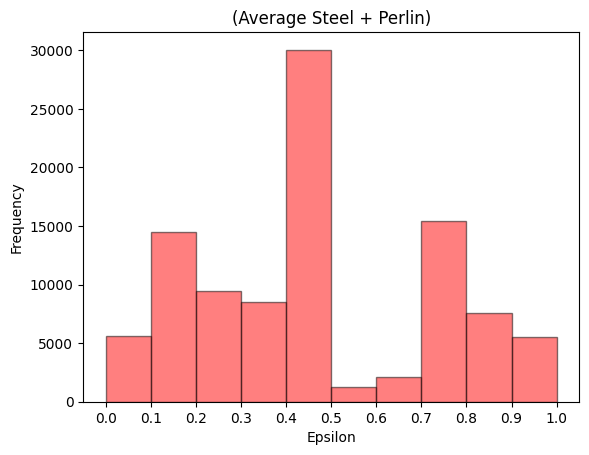

In [3]:
perlin = pd.read_csv('../../data/results/perlin/best_steel_model.csv')
plot_epsilon_distribution(perlin, "(Average Steel + Perlin)")

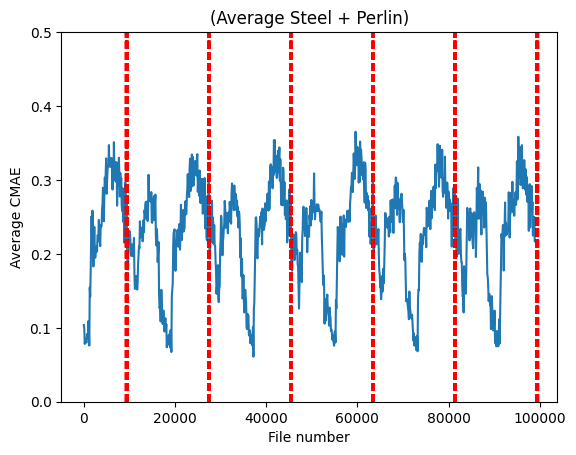

In [4]:
both_perlin = generate_merged_df(perlin, exact)
plot_average_cmae(both_perlin, "(Average Steel + Perlin)")

# 2. Fourier Steel Noise + Perlin

The model trained on 30,000 images (30 images with the same epsilon value) using averaged steel noise with added Perlin noise. Model was trained for 30 epochs with CosineAneallingWarmupRestarts Scheduler.

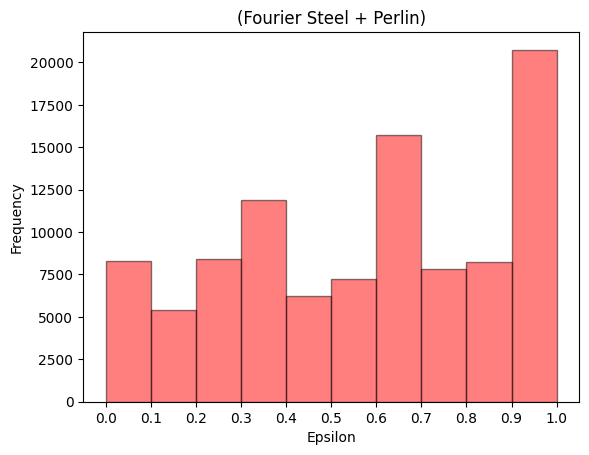

In [5]:
fourier = pd.read_csv('../../data/results/perlin/fourier/best_steel_model.csv')
plot_epsilon_distribution(fourier, "(Fourier Steel + Perlin)")

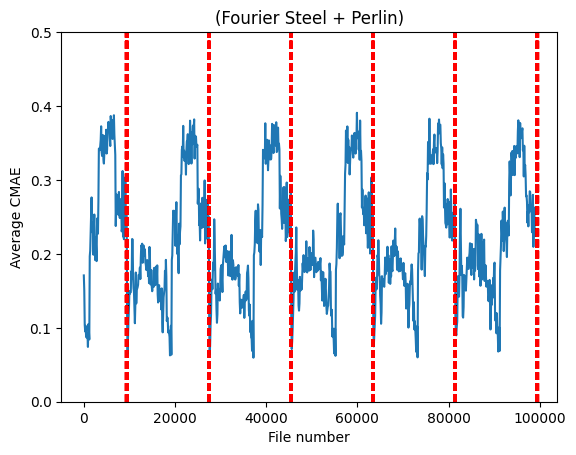

In [6]:
both_fourier = generate_merged_df(fourier, exact)
plot_average_cmae(both_fourier, "(Fourier Steel + Perlin)")

# 3. Fourier Steel Noise + Perlin + Basics images

The model trained on 70,000 images (70 images with the same epsilon value) using averaged steel noise with added Perlin noise + Basic noised images. Model was trained for 30 epochs with CosineAneallingWarmupRestarts Scheduler.

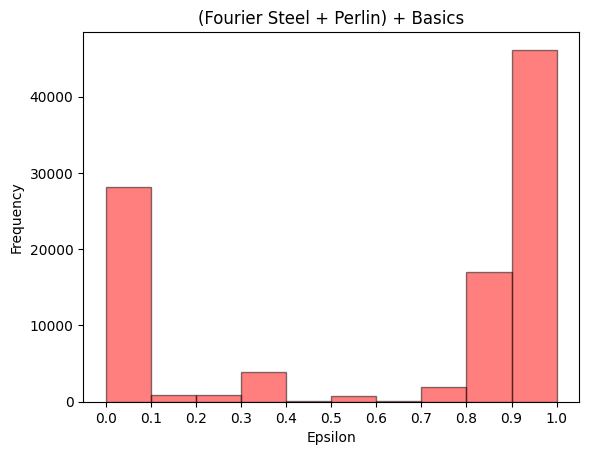

In [7]:
fourier_basics = pd.read_csv('../../data/results/perlin/fourier_basics/best_steel_model.csv')
plot_epsilon_distribution(fourier_basics, "(Fourier Steel + Perlin) + Basics")

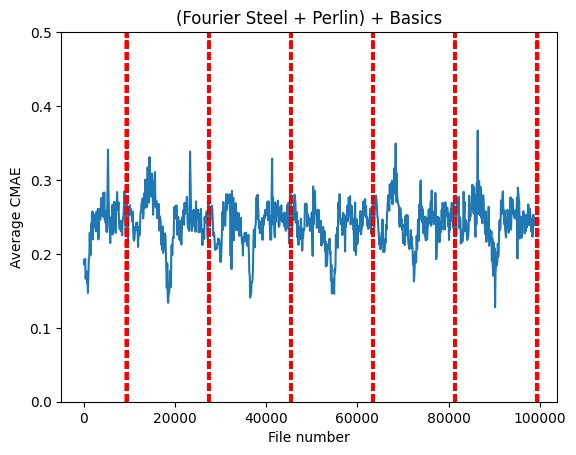

In [8]:
both_fourier_basics = generate_merged_df(fourier_basics, exact)
plot_average_cmae(both_fourier_basics, "(Fourier Steel + Perlin) + Basics")

# 4. Ceramic Average Noise + Perlin

The model trained on 30,000 images (30 images with the same epsilon value) using averaged ceramic noise with added Perlin noise. Model was trained for 30 epochs with CosineAneallingWarmupRestarts Scheduler.

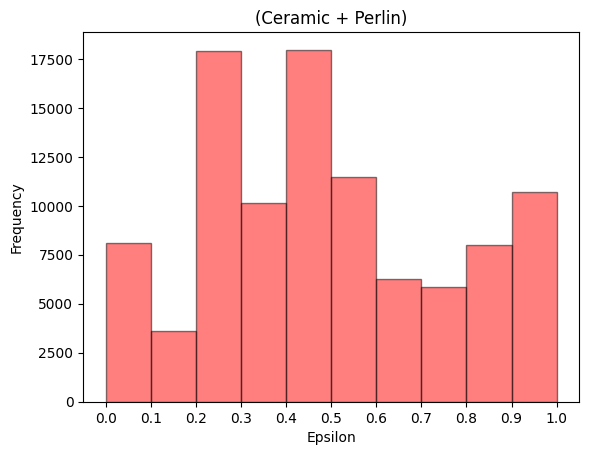

In [9]:
ceramic = pd.read_csv('../../data/results/perlin/ceramic/best_steel_model.csv')
plot_epsilon_distribution(ceramic, "(Ceramic + Perlin)")

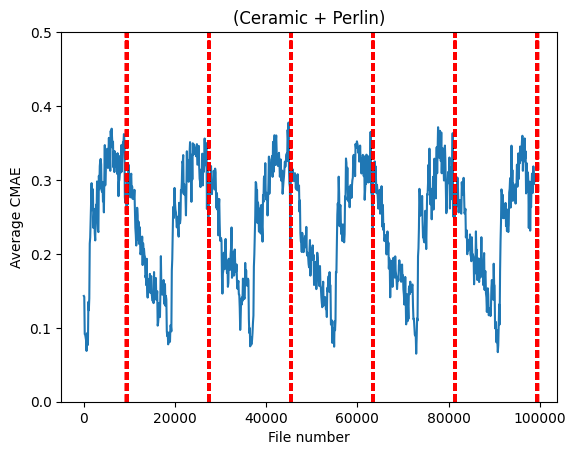

In [10]:
both_ceramic = generate_merged_df(ceramic, exact)
plot_average_cmae(both_ceramic, "(Ceramic + Perlin)")

# 5. Ceramic Average Noise + Fourier Average Noise + Perlin

The model trained on 60,000 images (60 images with the same epsilon value) using averaged ceramic noise, and fourier steel noise, both with added Perlin noise. Model was trained for 30 epochs with CosineAneallingWarmupRestarts Scheduler.

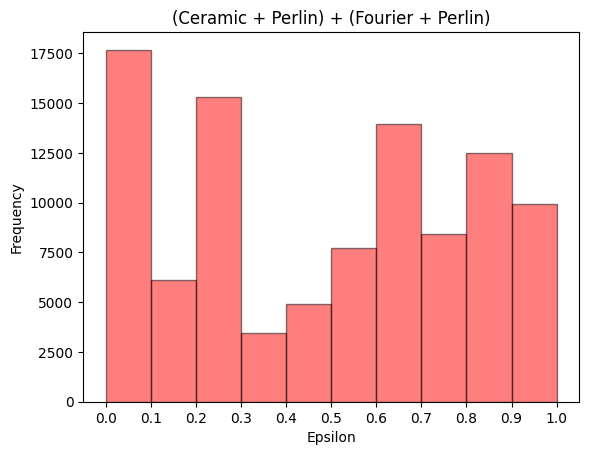

In [11]:
ceramic_fourier = pd.read_csv('../../data/results/perlin/ceramic_fourier/best_steel_model.csv')
plot_epsilon_distribution(ceramic_fourier, "(Ceramic + Perlin) + (Fourier + Perlin)")

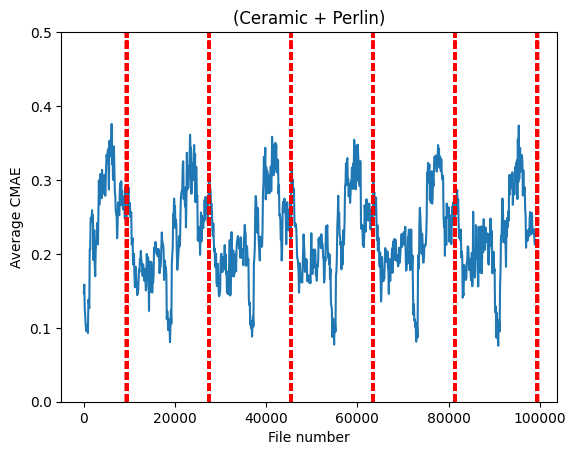

In [12]:
both_ceramic_fourier = generate_merged_df(ceramic_fourier, exact)
plot_average_cmae(both_ceramic_fourier, "(Ceramic + Perlin)")

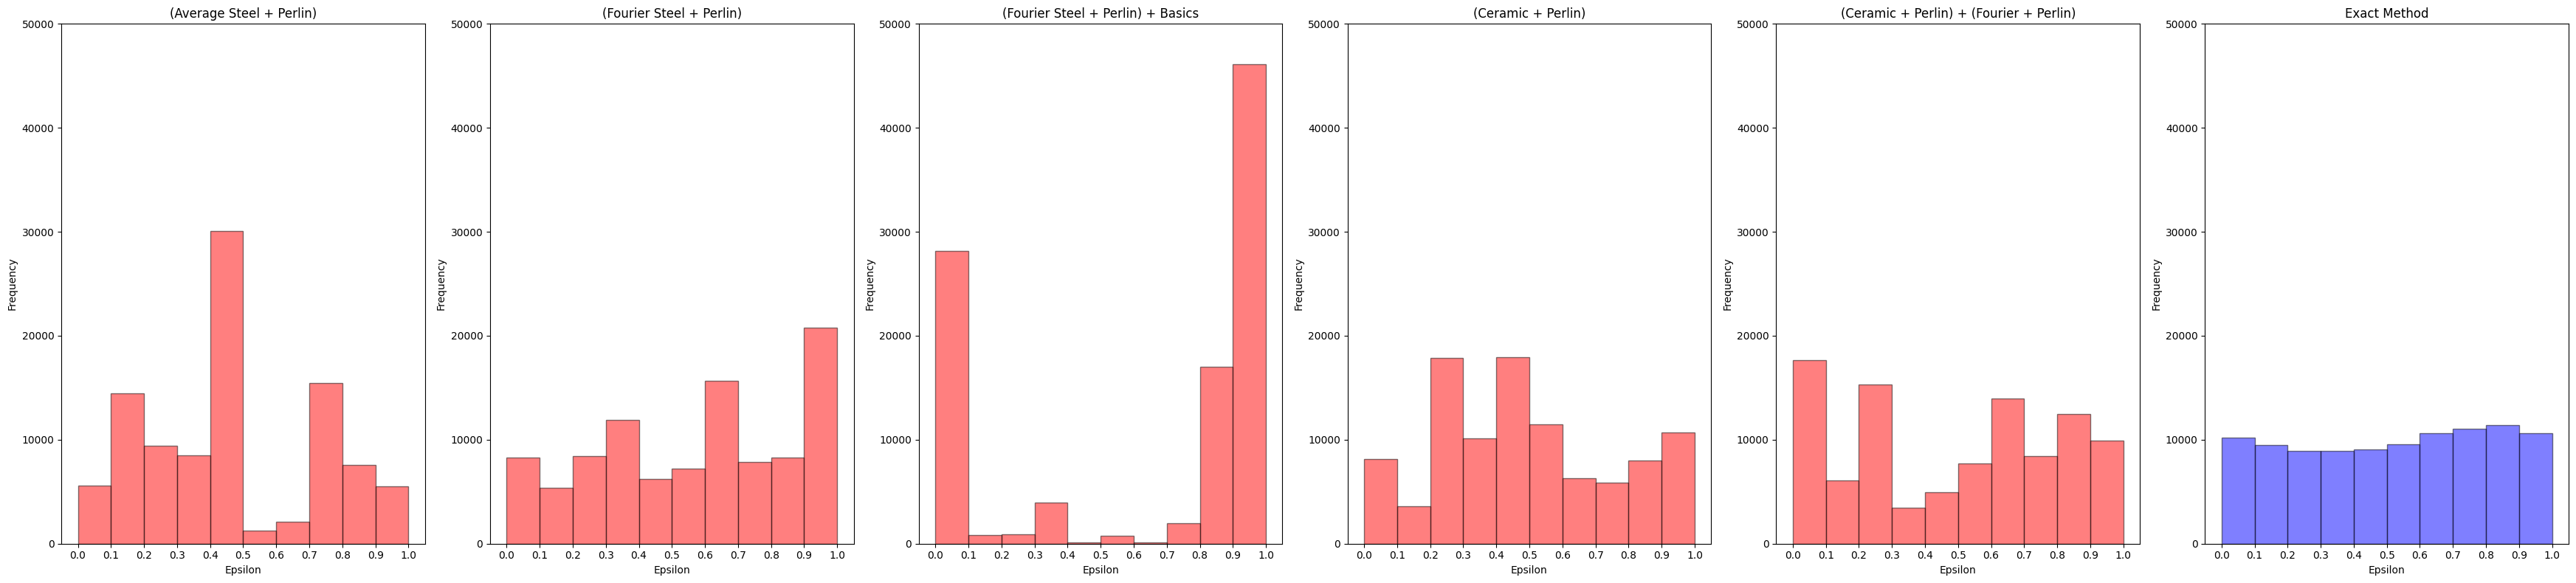

In [13]:
dfs = [perlin, fourier, fourier_basics, ceramic, ceramic_fourier, exact]
labels = ["(Average Steel + Perlin)", "(Fourier Steel + Perlin)", "(Fourier Steel + Perlin) + Basics", "(Ceramic + Perlin)", "(Ceramic + Perlin) + (Fourier + Perlin)", "Exact Method"]
plot_multiple_epsilon_distributions(dfs, labels)


Average loss w.r.t the exact method

In [14]:
dfs_cmae = [both_perlin, both_fourier, both_fourier_basics, both_ceramic, both_ceramic_fourier]
labels_cmae = labels[0:5]
for i in range(len(dfs_cmae)):
    print(f"Average CMAE for {labels_cmae[i]}: {dfs_cmae[i]['cmae'].mean()}")

Average CMAE for (Average Steel + Perlin): 0.22981485342091298
Average CMAE for (Fourier Steel + Perlin): 0.22122180288899676
Average CMAE for (Fourier Steel + Perlin) + Basics: 0.24162929946612507
Average CMAE for (Ceramic + Perlin): 0.2405860219678451
Average CMAE for (Ceramic + Perlin) + (Fourier + Perlin): 0.2282830087730487


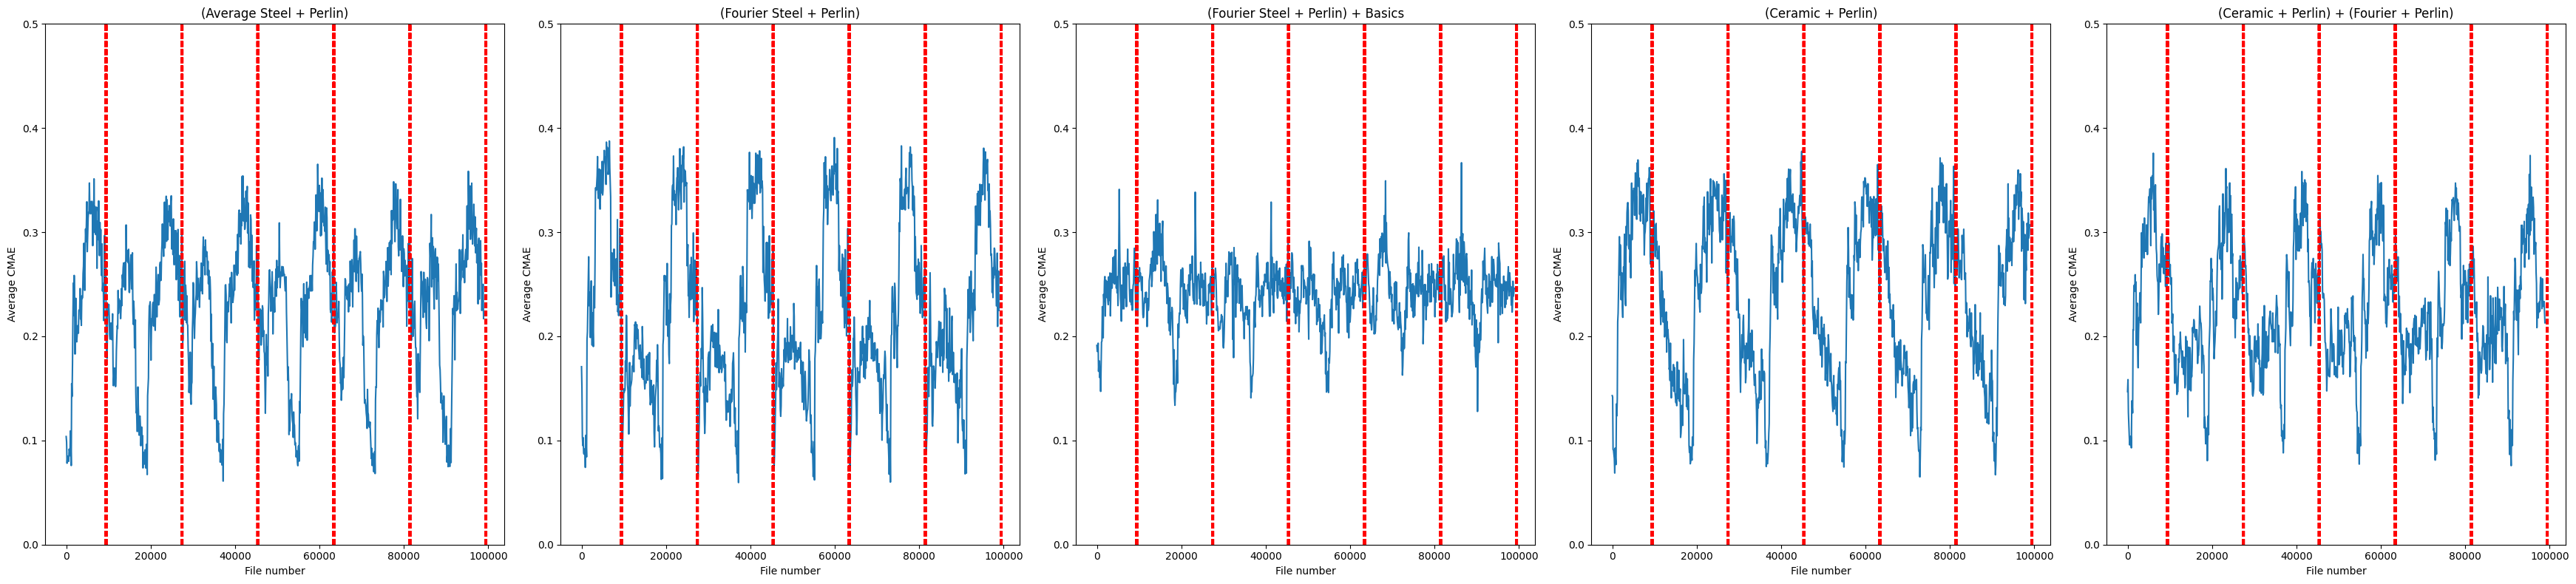

In [15]:
plot_multiple_average_cmae(dfs_cmae, labels_cmae)


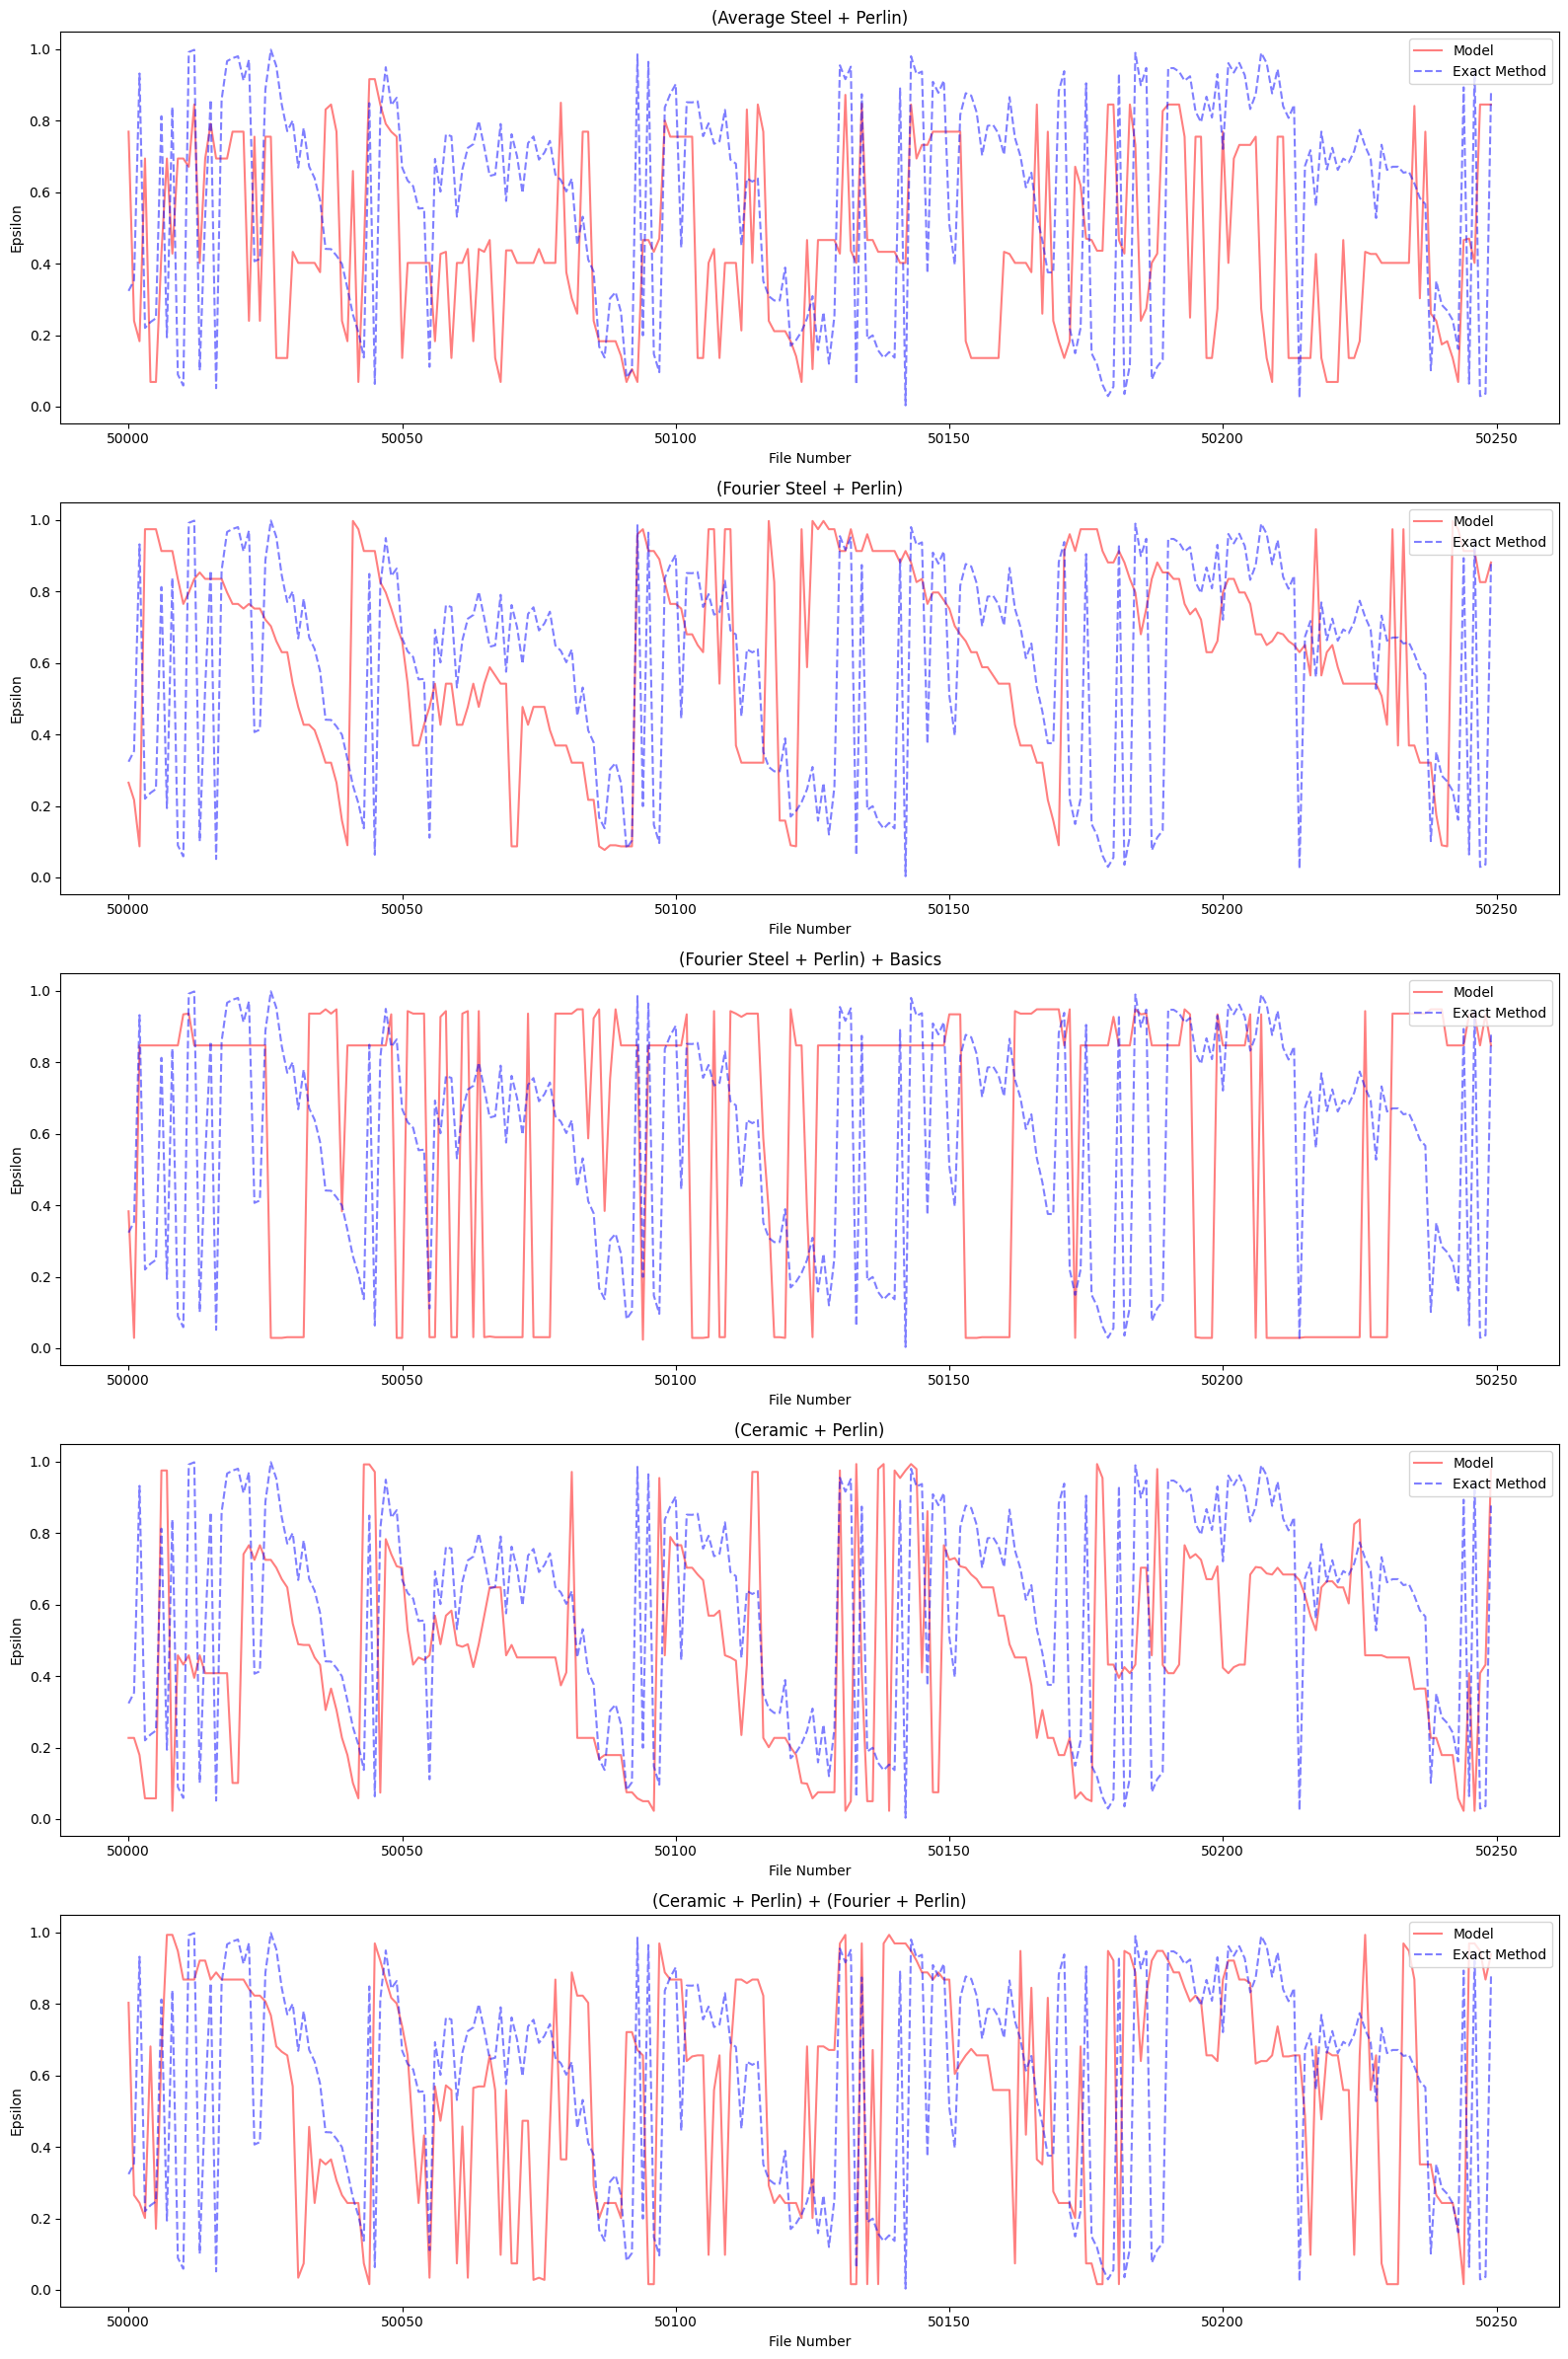

In [26]:
plot_multiple_subareas(dfs_cmae, labels_cmae, start=50000, samples=250)

# Averege Steel with CMAE < 0.1

In [24]:
both_perlin[both_perlin['cmae'] < 0.1].to_csv('perlin_steel_low_cmae.csv', index=False)